In [1]:
# Import Libraries
import pandas as pd
import os
import petpy
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np

from library.sb_utils import save_file
from library.preprocess import pet_pre_process
from library.preprocess import jlcap_pet_add_cities
from library.preprocess import jlcal_pet_calculate_duration_as_adoptable

In [2]:
dogs_df = pd.read_csv('data/dogs_2019.csv')
dogs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38598 entries, 0 to 38597
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      38598 non-null  int64  
 1   organization_id         38598 non-null  object 
 2   url                     38598 non-null  object 
 3   type                    38598 non-null  object 
 4   species                 38598 non-null  object 
 5   breeds                  38598 non-null  object 
 6   colors                  38598 non-null  object 
 7   age                     38598 non-null  object 
 8   gender                  38598 non-null  object 
 9   size                    38598 non-null  object 
 10  coat                    33888 non-null  object 
 11  attributes              38598 non-null  object 
 12  environment             38598 non-null  object 
 13  tags                    38598 non-null  object 
 14  name                    38598 non-null

In [3]:
dogs = pet_pre_process(dogs_df)
dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9638 entries, 44334560 to 46506415
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   organization_id    9638 non-null   object 
 1   age                9638 non-null   object 
 2   gender             9638 non-null   object 
 3   size               9638 non-null   object 
 4   coat               8424 non-null   object 
 5   status_changed_at  9638 non-null   object 
 6   published_at       9638 non-null   object 
 7   distance           9638 non-null   float64
 8   spayed_neutered    9638 non-null   bool   
 9   house_trained      9638 non-null   bool   
 10  declawed           0 non-null      object 
 11  special_needs      9638 non-null   bool   
 12  shots_current      9638 non-null   bool   
 13  breed_primary      9638 non-null   object 
 14  breed_secondary    3776 non-null   object 
 15  breed_mixed        9638 non-null   bool   
 16  breed_unknown

In [4]:
dogs.head()

,organization_id,age,gender,size,coat,status_changed_at,published_at,distance,spayed_neutered,house_trained,...,breed_mixed,breed_unknown,color_primary,color_secondary,color_tertiary,goodwith_children,goodwith_dogs,goodwith_cats,hasimage,hasvideo
id,,,,,,,,,,,,,,,,,,,,,
44334560,ID150,Adult,Male,Large,Medium,2019-08-09T05:11:09+0000,2019-03-28T17:48:00+0000,8.4989,True,True,...,False,False,Black,Yellow / Tan / Blond / Fawn,None,True,True,False,True,False
43915812,ID150,Senior,Female,Large,Medium,2019-10-18T21:20:35+0000,2019-02-01T18:25:59+0000,8.4989,True,True,...,False,False,Black,Yellow / Tan / Blond / Fawn,None,True,True,True,True,False
43879646,ID150,Adult,Female,Large,Medium,2019-02-25T04:44:05+0000,2019-01-28T04:36:15+0000,8.4989,True,True,...,False,False,Black,Brown / Chocolate,None,None,True,False,True,True
43879638,ID150,Baby,Male,Large,Medium,2019-02-17T04:46:21+0000,2019-01-28T04:22:30+0000,8.4989,False,False,...,True,False,Bicolor,None,None,True,True,True,True,False
43674254,ID150,Adult,Female,Large,Medium,2019-02-04T23:22:15+0000,2019-01-02T17:34:26+0000,8.4989,True,True,...,False,False,Apricot / Beige,Black,None,True,True,None,True,False


In [5]:
dogs.dtypes

organization_id       object
age                   object
gender                object
size                  object
coat                  object
status_changed_at     object
published_at          object
distance             float64
spayed_neutered         bool
house_trained           bool
declawed              object
special_needs           bool
shots_current           bool
breed_primary         object
breed_secondary       object
breed_mixed             bool
breed_unknown           bool
color_primary         object
color_secondary       object
color_tertiary        object
goodwith_children     object
goodwith_dogs         object
goodwith_cats         object
hasimage                bool
hasvideo                bool
dtype: object

In [6]:
dogs_adoptable = jlcal_pet_calculate_duration_as_adoptable(dogs)

count    9602.000000
mean       40.915568
std        75.206569
min         0.000231
25%         6.888909
50%        16.632228
75%        40.977653
max       833.943646
Name: duration_as_adoptable, dtype: float64


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


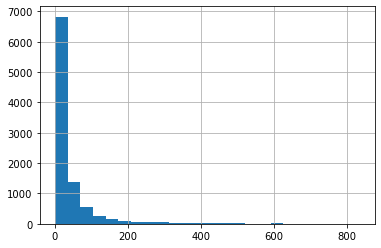

In [7]:
# plot duration column
dogs_adoptable['duration_as_adoptable'].hist(bins=24)
plt.xlabel = 'Days Before Adoption'
plt.ylabel = 'Amount'
plt.show()

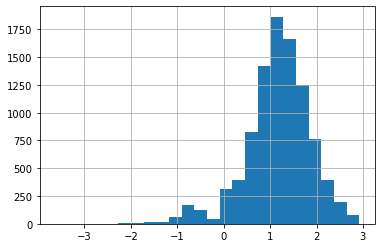

In [8]:
# plot duration column
np.log10(dogs_adoptable['duration_as_adoptable']).hist(bins=24)
plt.xlabel = 'Days Before Adoption'
plt.ylabel = 'Amount'
plt.show()

In [9]:
dogs_adoptable.shape

(9602, 24)

## Add cities to dataframe, mapped to organization_id

In [12]:
dogs_cities = jlcap_pet_add_cities(dogs_adoptable)
dogs_cities.head()

/Users/jessica/_DS Course/Pet-Adoptions/library/preprocess.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['city'] = df['organization_id'].map(city_adopted)
/Users/jessica/_DS Course/Pet-Adoptions/library/preprocess.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['city'], inplace=True)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

,age,gender,size,coat,distance,spayed_neutered,house_trained,declawed,special_needs,shots_current,...,color_primary,color_secondary,color_tertiary,goodwith_children,goodwith_dogs,goodwith_cats,hasimage,hasvideo,duration_as_adoptable,city
id,,,,,,,,,,,,,,,,,,,,,
44350387,Young,Male,Small,Short,7.5018,True,False,None,False,True,...,White / Cream,Yellow / Tan / Blond / Fawn,None,None,None,None,True,False,279.390694,Puyallup
44350354,Young,Male,Small,Short,7.5018,True,False,None,False,True,...,White / Cream,Yellow / Tan / Blond / Fawn,None,None,True,None,True,False,11.029653,Puyallup
44337381,Young,Male,Small,NaN,6.2630,True,False,None,False,True,...,White / Cream,None,None,False,True,None,True,False,257.814213,Covington
44337382,Young,Male,Small,NaN,6.2630,True,False,None,False,True,...,None,None,None,None,True,None,True,False,62.869190,Covington
44337376,Adult,Male,Small,NaN,6.2630,True,False,None,False,True,...,None,None,None,False,True,None,True,False,402.292569,Covington


In [13]:
# save the data to a new csv file
datapath = 'data'
save_file(dogs_cities, 'dogs_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "data/dogs_cleaned.csv"


In [14]:

dogs_cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7585 entries, 44350387 to 46177453
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    7585 non-null   object 
 1   gender                 7585 non-null   object 
 2   size                   7585 non-null   object 
 3   coat                   6461 non-null   object 
 4   distance               7585 non-null   float64
 5   spayed_neutered        7585 non-null   bool   
 6   house_trained          7585 non-null   bool   
 7   declawed               0 non-null      object 
 8   special_needs          7585 non-null   bool   
 9   shots_current          7585 non-null   bool   
 10  breed_primary          7585 non-null   object 
 11  breed_secondary        2810 non-null   object 
 12  breed_mixed            7585 non-null   bool   
 13  breed_unknown          7585 non-null   bool   
 14  color_primary          5584 non-null   object

In [ ]:
T